In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import keras
import sys
    
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from keras.models import Sequential
from sklearn import model_selection
from keras.layers import Dense
from keras import regularizers
from keras import optimizers
from sklearn.svm import SVC

### Dividindo X e Y para o modelo

In [71]:
data = pd.read_csv('dados.csv', sep=',')
X = np.array(data.drop(['MADE'], axis=1))
y = np.array(data['MADE'])

### Dividindo os dados de treino e teste

In [72]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=23, test_size=0.2)

### Dividindo os dados de treino para validação

In [73]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=23, test_size=0.2)

## Rede Neural

### Criando a rede neural

In [74]:
model = Sequential()
model.add(Dense(60, input_dim=12, activation='relu', use_bias = True, bias_initializer='ones')) #camda de entrada
model.add(Dense(1, activation='sigmoid'))# camada de saída

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 60)                780       
                                                                 
 dense_23 (Dense)            (None, 1)                 61        
                                                                 
Total params: 841 (3.29 KB)
Trainable params: 841 (3.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Treinando a rede neural

In [75]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

Epoch 1/10


8385/8385 [==============================] - 9s 1ms/step - loss: 0.9313 - accuracy: 0.5442 - val_loss: 0.7553 - val_accuracy: 0.5415
Epoch 2/10
8385/8385 [==============================] - 8s 910us/step - loss: 0.8058 - accuracy: 0.5546 - val_loss: 0.6819 - val_accuracy: 0.5852
Epoch 3/10
8385/8385 [==============================] - 7s 878us/step - loss: 0.7639 - accuracy: 0.5578 - val_loss: 0.6720 - val_accuracy: 0.6003
Epoch 4/10
8385/8385 [==============================] - 7s 841us/step - loss: 0.7243 - accuracy: 0.5675 - val_loss: 0.7197 - val_accuracy: 0.5680
Epoch 5/10
8385/8385 [==============================] - 7s 812us/step - loss: 0.7050 - accuracy: 0.5747 - val_loss: 0.7851 - val_accuracy: 0.4917
Epoch 6/10
8385/8385 [==============================] - 7s 822us/step - loss: 0.6922 - accuracy: 0.5803 - val_loss: 0.6708 - val_accuracy: 0.5979
Epoch 7/10
8385/8385 [==============================] - 7s 822us/step - loss: 0.6813 - accuracy: 0.5895 - val_loss: 0.6679 - val_accuracy

In [76]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Ein: %0.4f' % (1 - accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Eout: %0.4f' % (1 - accuracy))

Ein: 0.3785
Eout: 0.3777


In [77]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Acurácia de treino: %0.4f' % (accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Acurácia de teste: %0.4f' % (accuracy))

Acurácia de treino: 0.6215
Acurácia de teste: 0.6223


### Performance do modelo

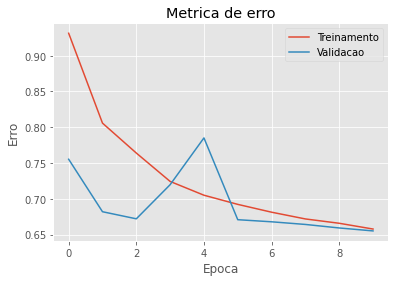

4193/4193 [==============================] - 2s 536us/step
--> Acuracia (train): 0.6215
--> Acuracia (test): 0.6223


In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

print(f'--> Acuracia (train): {accuracy_score(y_train, pred_train):.4f}')
print(f'--> Acuracia (test): {accuracy_score(y_test, pred):.4f}')